Характерний час загасання (τ3): 52 днів
Частота коливань (ω): 0.048
Період коливання (T_k): 130.79 днів


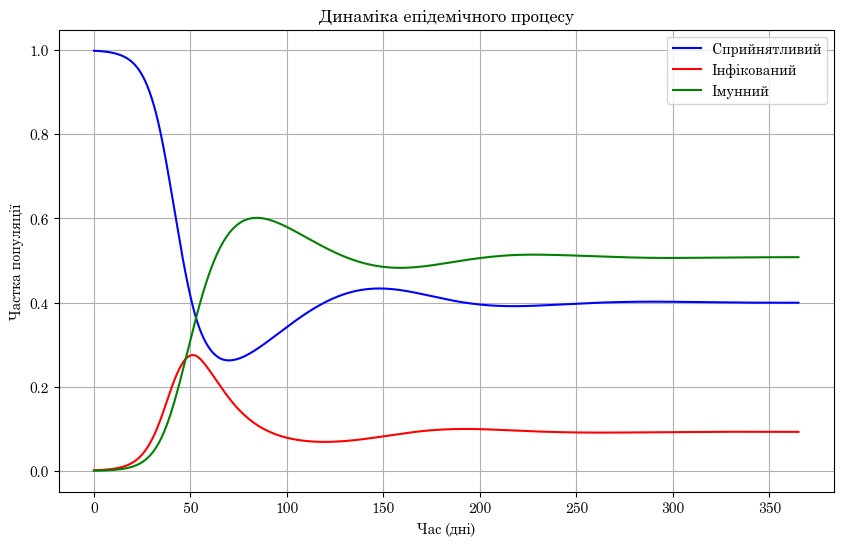

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Century Schoolbook'

N = 1000  
R = 2.5  
T = 65 
tau = 10  
gamma, beta, alpha = 1 / T, 1 / tau, R / (N * tau)

def epidemic_model(t, y):
    N_I, N_S = y
    dN_I = alpha * N_S * N_I - beta * N_I
    dN_S = gamma * (N - N_S) - alpha * N_S * N_I
    return [dN_I, dN_S]

y0 = [1, N - 1]  
t_span = (0, 365) 
t_eval = np.linspace(*t_span, 1000)

sol = solve_ivp(epidemic_model, t_span, y0, t_eval=t_eval)
N_I, N_S = sol.y
N_immune = N - N_S - N_I

t3 = 2 / (gamma * R)
omega = np.sqrt(beta * gamma * (R - 1))
T_k = 2 * np.pi / omega 

print(f"Характерний час загасання (τ3): {t3:.0f} днів")
print(f"Частота коливань (ω): {omega:.3f}")
print(f"Період коливання (T_k): {T_k:.2f} днів")

plt.figure(figsize=(10, 6))
plt.plot(sol.t, N_S / N, label="Сприйнятливий", color="blue")
plt.plot(sol.t, N_I / N, label="Інфікований", color="red")
plt.plot(sol.t, N_immune / N, label="Імунний", color="green")
plt.title("Динаміка епідемічного процесу")
plt.xlabel("Час (дні)")
plt.ylabel("Частка популяції")
plt.legend()
plt.grid()
plt.show()


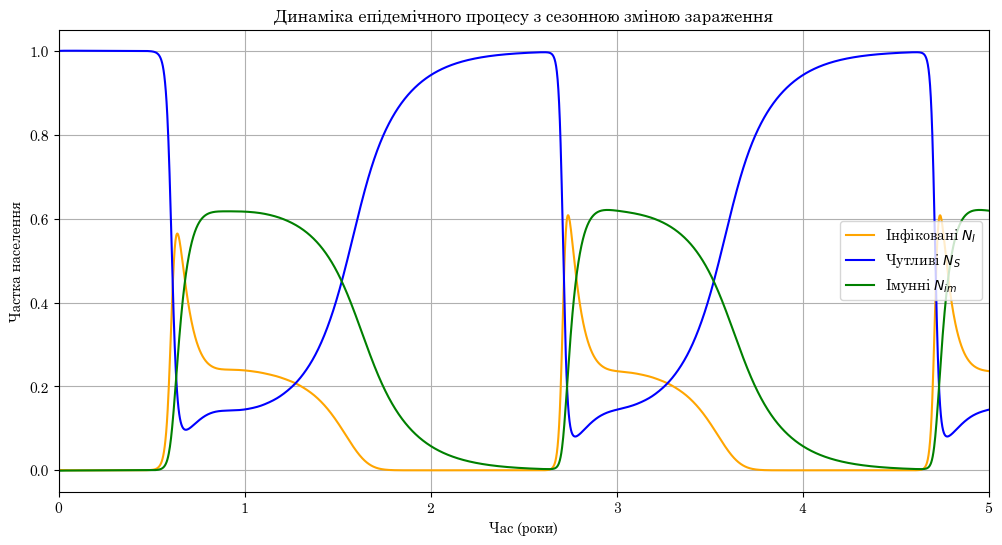

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 100000  
R = 2.8  
T = 75  
T1 = 365 * 2  
tau = 21  
gamma, beta, alpha_0 = 1 / T, 1 / tau, R / (N * tau) 
A = 1.5 * alpha_0 
phi = 5 
omega_1 = 2 * np.pi / T1  

def alpha(t):
    return alpha_0 + A * np.sin(omega_1 * t + phi)

def epidemic_model(t, y):
    N_I, N_S = y
    dN_I = alpha(t) * N_S * N_I - beta * N_I
    dN_S = gamma * (N - N_S) - alpha(t) * N_S * N_I
    return [dN_I, dN_S]

y0 = [100, N - 1]  
t_span = (0, 10 * 365)  
t_eval = np.linspace(*t_span, 5000) 

sol = solve_ivp(epidemic_model, t_span, y0, t_eval=t_eval)
N_I, N_S = sol.y
N_immune = N - N_S - N_I 

plt.figure(figsize=(12, 6))
plt.xlim(0, 5)
plt.plot(sol.t / 365, N_I / N, label="Інфіковані $N_I$", color="orange")
plt.plot(sol.t / 365, N_S / N, label=r"Чутливі $N_S$", color="blue")
plt.plot(sol.t / 365, N_immune / N, label=r"Імунні $N_{im}$", color="green")
plt.title("Динаміка епідемічного процесу з сезонною зміною зараження")
plt.xlabel("Час (роки)")
plt.ylabel("Частка населення")
plt.legend()
plt.grid()
plt.show()


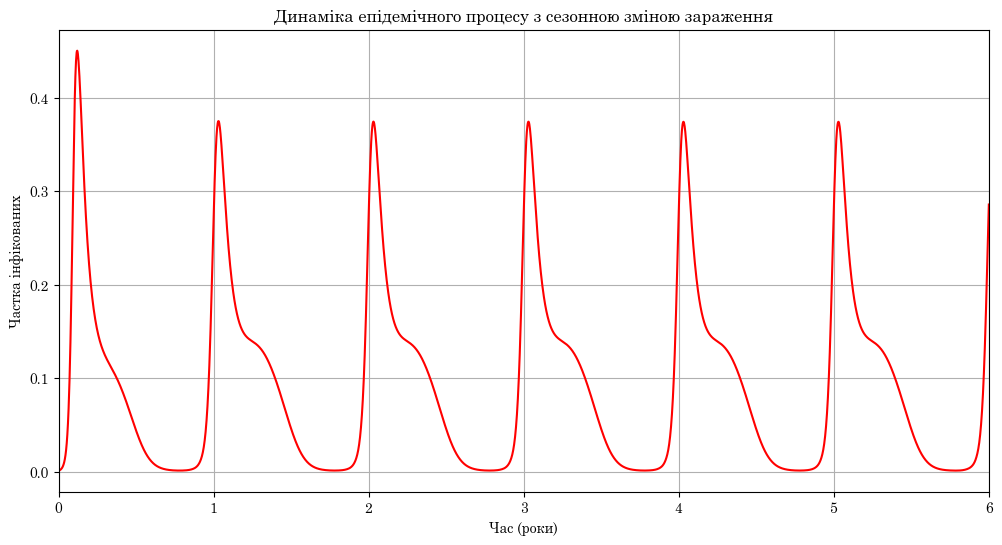

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 100000  
R = 2.2 
T = 65
T1 = 365
tau = 14
gamma, beta, alpha_0 = 1 / T, 1 / tau, R / (N * tau)
A = 0.8 * alpha_0 
phi = 7 
omega_1 = 2 * np.pi / T1

def alpha(t):
    return alpha_0 + A * np.sin(omega_1 * t + phi)

def epidemic_model(t, y):
    N_I, N_S = y
    dN_I = alpha(t) * N_S * N_I - beta * N_I
    dN_S = gamma * (N - N_S) - alpha(t) * N_S * N_I
    return [dN_I, dN_S]

y0 = [100, N - 1]
t_span = (0, 10 * 365)
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(epidemic_model, t_span, y0, t_eval=t_eval)
N_I, N_S = sol.y

plt.figure(figsize=(12, 6))
plt.xlim(0, 6)
plt.plot(sol.t / 365, N_I / N, label="Інфіковані (N_I)", color="red")
plt.title("Динаміка епідемічного процесу з сезонною зміною зараження")
plt.xlabel("Час (роки)")
plt.ylabel("Частка інфікованих")
plt.grid()
plt.show()



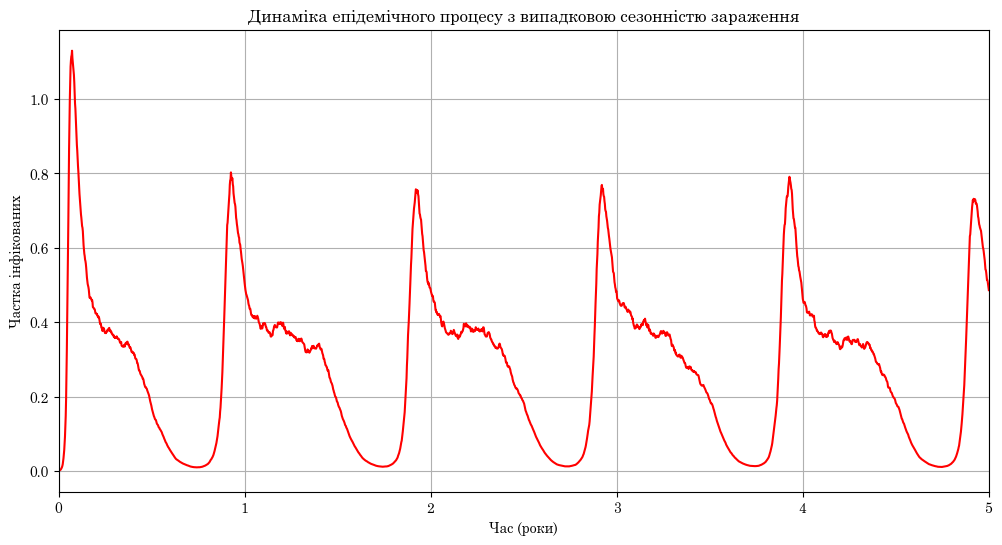

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 100000  
R_0 = 2.2  
T = 65 
T1 = 365
gamma, alpha_0 = 1 / T, R_0 / (N * 14)  
A = 0.9 * alpha_0  
phi = 7

def random_tau(t):
    return np.random.uniform(14, 21)

def random_R(t):
    return R_0 * np.random.uniform(0.5, 1.0)

def alpha(t):
    
    omega_1 = 2 * np.pi / T1
    return alpha_0 + A * np.sin(omega_1 * t + phi)

def beta(t):
    tau = random_tau(t)
    return 1 / tau

def epidemic_model(t, y):
    N_I, N_S = y
    R = random_R(t)  
    dN_I = R * alpha(t) * N_S * N_I - beta(t) * N_I
    dN_S = gamma * (N - N_S) - alpha(t) * N_S * N_I
    return [dN_I, dN_S]

y0 = [100, N - 1]  
t_span = (0, 10 * 365)  
t_eval = np.linspace(*t_span, 5000)

sol = solve_ivp(epidemic_model, t_span, y0, t_eval=t_eval)
N_I, N_S = sol.y

plt.figure(figsize=(12, 6))
plt.xlim(0, 5)
plt.plot(sol.t / 365, N_I / N, label="Інфіковані (N_I)", color="red")
plt.title("Динаміка епідемічного процесу з випадковою сезонністю зараження")
plt.xlabel("Час (роки)")
plt.ylabel("Частка інфікованих")
plt.grid()
plt.show()
